实验 2：  共享单车预测  
一、实验目的： 
1、掌握离散数据和连续数据的预处理。 
2、掌握利用神经网络对非线性函数的拟合和预测。 
3、观察拟合后得到的模型并观察预测误差。  
 
二、实验内容： 
1、通过历史数据预测某一地区接下来一段时间内的共享单车的数量。数据
保存在文件 bikes.csv 中，请按 11:1 的比例划分训练集和测试集，首先对数据进
行预处理，然后在训练集上训练，并在测试集上验证模型。 
        
2、设计神经网络数据进行拟合，利用训练后的模型对数据拟合并进行预测，
记录误差，并绘制出拟合效果。  
                  
三、实验准备 
1、下载和安装 Anaconda, Pytorch 和 cuda 库 
      
2、下载和安装 Jupyter Notebook 或 Pycharm 或 Vs code 
 
 
四、实验指导 
   参考课堂资料和课件

In [1]:
import torch
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# 离散数据预处理
data = pd.read_csv("D:\\Mis\\project\\python\\dataMine\\data\\bikes.csv")
col_titles = ['season','weathersit','mnth','hr','weekday']
for i in col_titles:
    dummies = pd.get_dummies(data[i],prefix=i)
    data = pd.concat([data,dummies],axis=1)
col_titles_to_drop = ['instant','dteday','season','weathersit','weekday','mnth','workingday','hr']
data = data.drop(col_titles_to_drop,axis = 1)
# print(data)

In [3]:
col_titles = ['cnt','temp','hum','windspeed']
for i in col_titles:
    mean,std = data[i].mean(),data[i].std()
    if i=='cnt':
        mean_cut,std_cnt = mean,std
    data[i] = (data[i]-mean)/std

In [4]:
#数据集处理
test_data = data[16000:]
train_data = data[:16000]
X = train_data.drop(['cnt'],axis=1)
X = X.values
Y = train_data['cnt']
Y = Y.values.astype(float)
Y = np.reshape(Y,[len(Y),1])

In [5]:
input_size = X.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size,output_size)
)
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(neu.parameters(),lr=0.01)

0 0.8801357
100 0.30351087
200 0.25966164
300 0.21159326
400 0.16913928
500 0.14301875
600 0.13111894
700 0.1252877
800 0.12178933
900 0.11944793


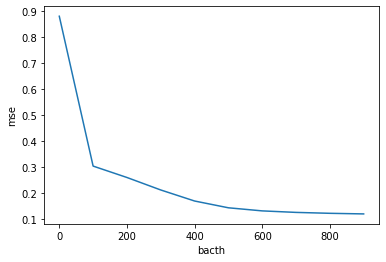

In [6]:
losses = []
for i in range(1000):
    batch_loss = []
    for start in range(0,len(X),batch_size):
        if start+batch_size<len(X):
            end = start + batch_size
        else:
            end = len(X)
        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(Y[start:end])
        pred = neu(x)
        loss = loss_fn(pred,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        batch_loss.append(loss.data.numpy())
    if i%100==0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))
plt.plot(np.arange(len(losses))*100,losses)
plt.xlabel('bacth')
plt.ylabel('mse')
plt.show()

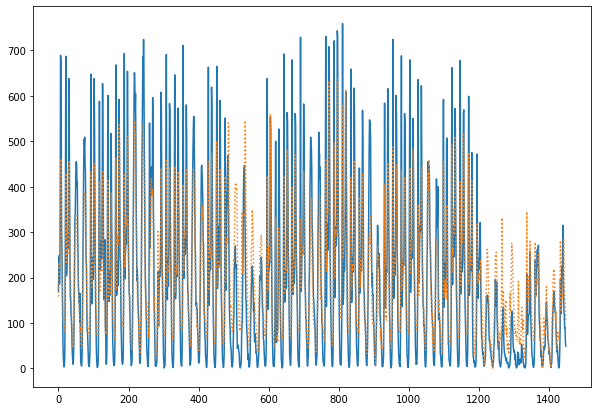

In [7]:
X = test_data.drop(['cnt'],axis=1)
Y = test_data['cnt']
Y = Y.values.reshape([len(Y),1])
X = torch.FloatTensor(X.values)
Y = torch.FloatTensor(Y)
pred = neu(X)

Y = Y.data.numpy()*std_cnt+mean_cut
pred = pred.data.numpy()*std_cnt+mean_cut
plt.figure(figsize=(10,7))
xplot ,=plt.plot(np.arange(X.size(0)),Y)
yplot ,=plt.plot(np.arange(X.size(0)),pred,':')
plt.show()

In [9]:
# #保存
# net = neu
# path = ''
# torch.save(net,path)
# torch.save(net.state_dict(),path)

# #加载
# net = torch.load(path)
# net = torch.nn.model.load_state_dict(torch.load(path))